Author:  Raphael Cousin

Project: https://github.com/racousin/algorithms_basics_python

# Theory
we want to find $x^* \in argmin_{x \in K} f(x)$

$K = \mathbb{R}^d$

__Rules:__

we note $s_t$ the learning rate, $d_k$ the direction of descent

* Armijo rule : to avoid too big steps

We looking for $s_k$ such as $f(x + s_kd_k) \leq f(x) + s_k \epsilon d_k$ with $\epsilon \in (0,1)$

* Wolfe rule : to avoid too small steps

We looking for $s_k$ such as $\nabla f(x + s_kd_k) \leq  \epsilon \nabla f(x)$ with $\epsilon \in (0,1)$



__Results:__

noting $h_t$ = $f(x_t) - f(x^*)$

assuming ($H_0$) (=(C), (D), (G) and $s_t$ optimal), we have $h_t = O(\frac{1}{\sqrt{t}})$

assuming ($H_0$) and ($\alpha$), we have $h_t = O(\frac{1}{\sqrt{t}})$

assuming ($H_0$) and ($\alpha$), we have $h_t = O(\frac{1}{\alpha t})$

assuming ($H_0$) and ($\beta$), we have $h_t = O(\frac{\beta}{t})$

assuming ($H_0$) and ($\gamma$), we have $h_t = O(e^{-\gamma t})$ with $s_t = \frac{1}{\beta}$

# Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
from scipy.misc import derivative

In [2]:
def grad_desc(f,T,x,s):
    its = np.zeros(T+1)
    its[0] = x
    for i,t in enumerate(range(T)):
        x = x - s * derivative(f,x)
        its[i+1] = x
    return x, its

In [3]:
def grad_desc_armijo(f,T,x,eps=10**-3):
    its = np.zeros(T+1)
    its[0] = x
    for i,t in enumerate(range(T)):
        s = 1;
        tmp_der = derivative(f,x)
        while f(x - s * tmp_der) > f(x) + s* eps * tmp_der:
            s = s/2
        x = x - s * tmp_der
        its[i+1] = x
    return x, its

In [4]:
def grad_desc_wolf(f,T,x,eps=10**-5):
    its = np.zeros(T+1)
    its[0] = x
    for i,t in enumerate(range(T)):
        s = 10**-6;
        tmp_der = derivative(f,x)
        while derivative(f, (x - s * tmp_der)) < eps * tmp_der:
            s = s*2
        x = x - s * tmp_der
        its[i+1] = x
    return x, its

# Example

In [5]:
f = lambda x: x**2

In [6]:
xs = np.linspace(-10,10,500)

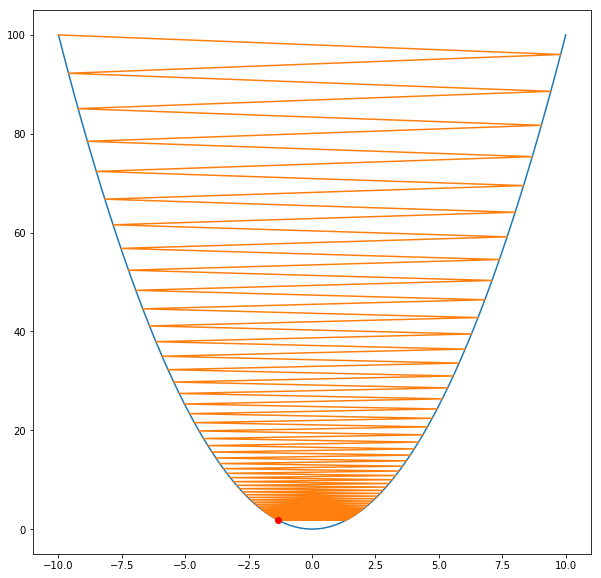

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
xrs, its = grad_desc(f,100,-10,0.99)
ax.plot(xs,f(xs))
ax.plot(its,f(its))
ax.plot(xrs,f(xrs),'or')

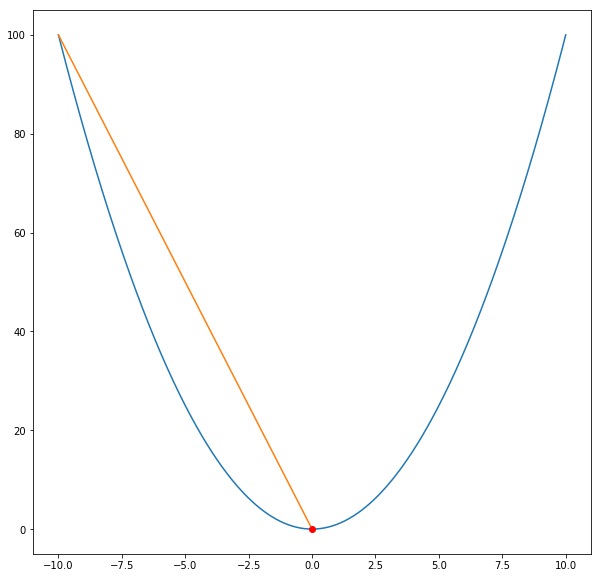

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
xrs, its = grad_desc_armijo(f,100,-10)
ax.plot(xs,f(xs))
ax.plot(its,f(its))
ax.plot(xrs,f(xrs),'or')

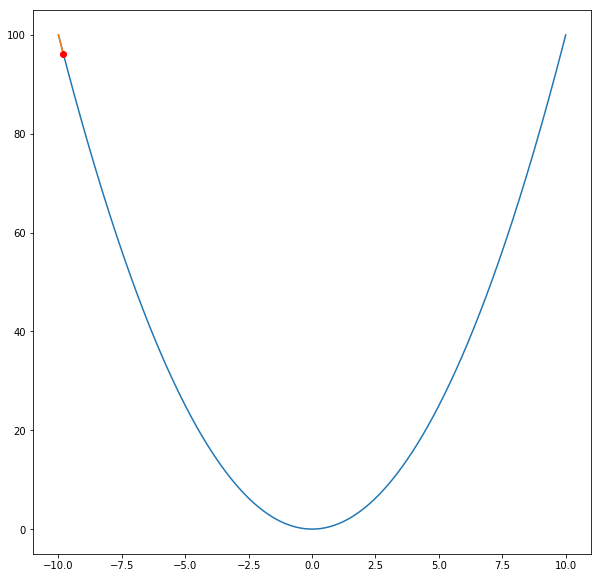

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
xrs, its = grad_desc(f,100,-10,10**-4)
ax.plot(xs,f(xs))
ax.plot(its,f(its))
ax.plot(xrs,f(xrs),'or')

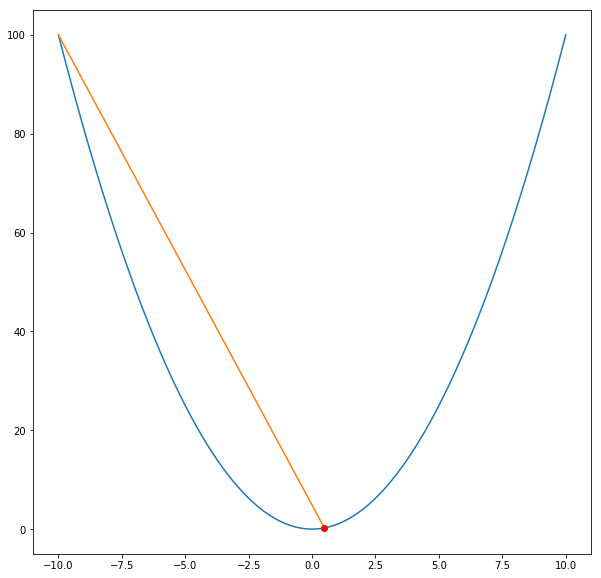

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
xrs, its = grad_desc_wolf(f,100,-10)
ax.plot(xs,f(xs))
ax.plot(its,f(its))
ax.plot(xrs,f(xrs),'or')